In [42]:
# Import packages
import math
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from matplotlib.ticker import ScalarFormatter

# Load dữ liệu

In [2]:
# Save filepath for easier access
gold_file_path = 'FINAL_USO.csv'

# Read the data with pandas and store it in a dataframe titled gold data
df = pd.read_csv(gold_file_path)

y = df['Adj Close'] 

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


# Kiểm tra giá trị null

In [8]:
# There are no null values
df.isnull().values.any()

False

# Ma trận tương quan giữa các biến có hệ số tương quan với 'Adj Close' Lớn hơn 0.5

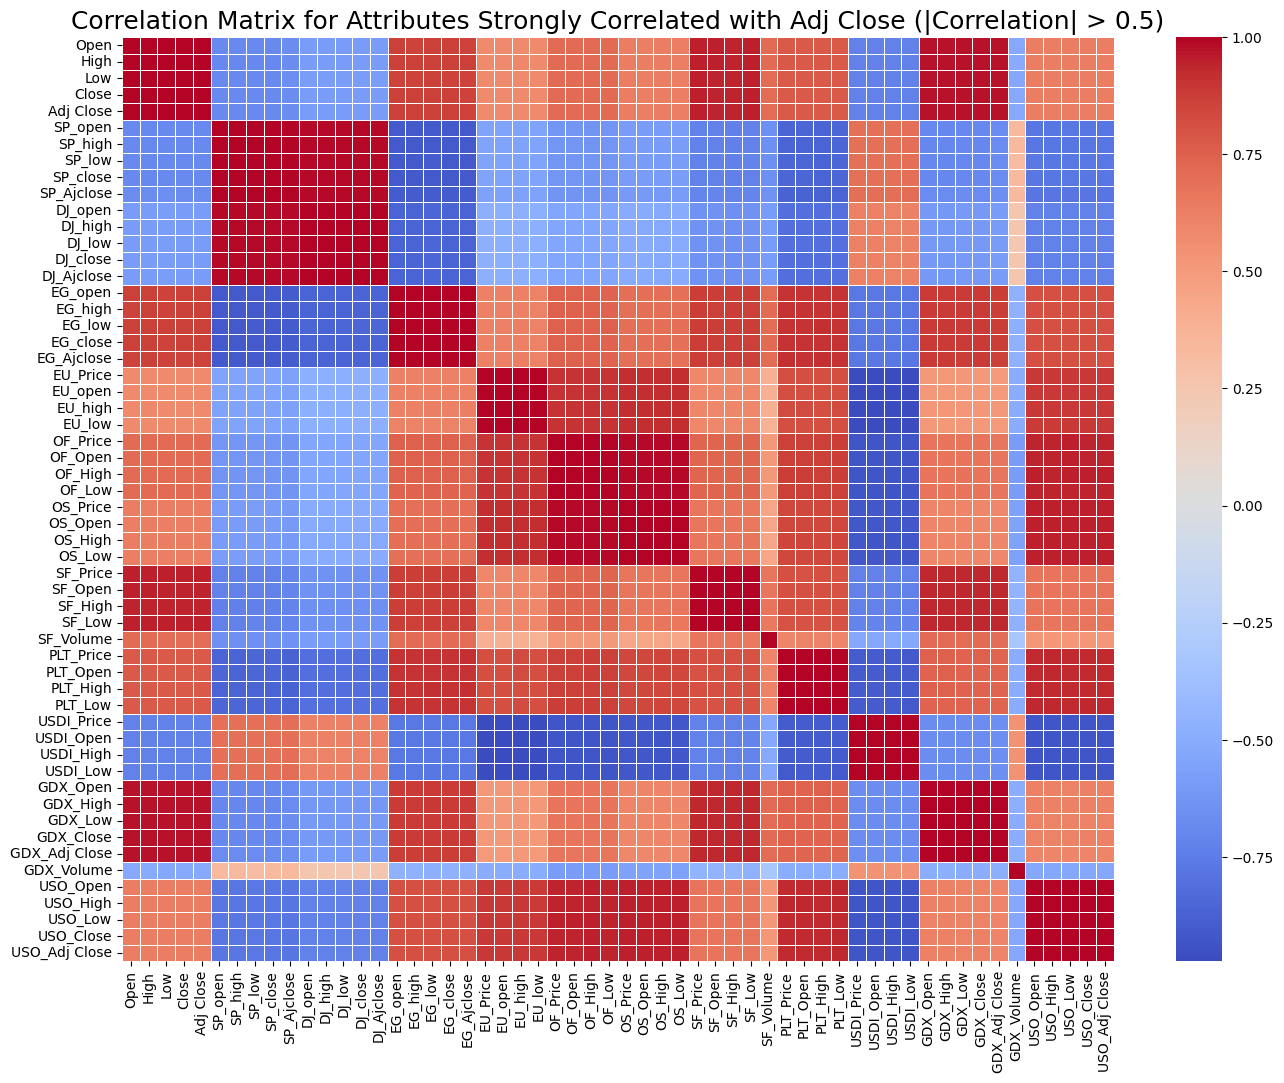

In [10]:
df_new = df.drop(columns=['Date']).copy()
correlation_matrix = df_new.corr()

# Identify columns with a correlation greater than 0.5 or less than -0.5 with 'Adj Close'
adj_close_corr = correlation_matrix['Adj Close']
strong_corr_columns = adj_close_corr[(adj_close_corr.abs() > 0.5)].index

# Create a filtered correlation matrix with only the strong correlations
strong_corr_matrix = df[strong_corr_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with the filtered correlation matrix
sns.heatmap(strong_corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)

# Set the title
plt.title('Correlation Matrix for Attributes Strongly Correlated with Adj Close (|Correlation| > 0.5)', fontsize=18)

# Display the plot
plt.show()

# Trực quan hóa dữ liệu

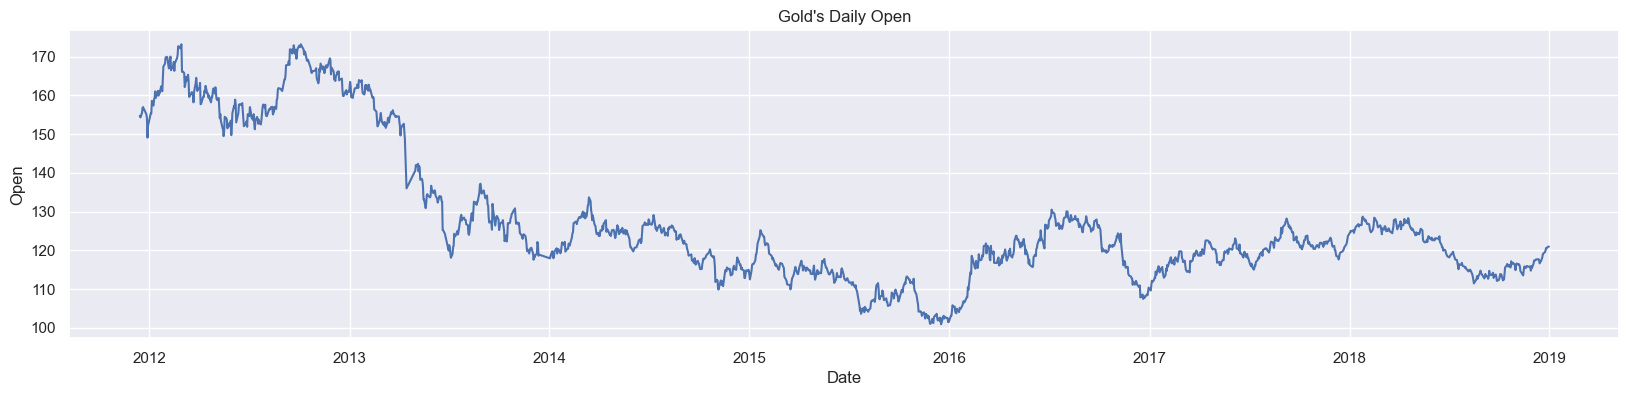

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

# Plot volatility
sns.set(rc={"figure.figsize":(20, 4)})
daily_change = sns.lineplot(x="Date", y="Open", data=df).set(title="Gold's Daily Open")

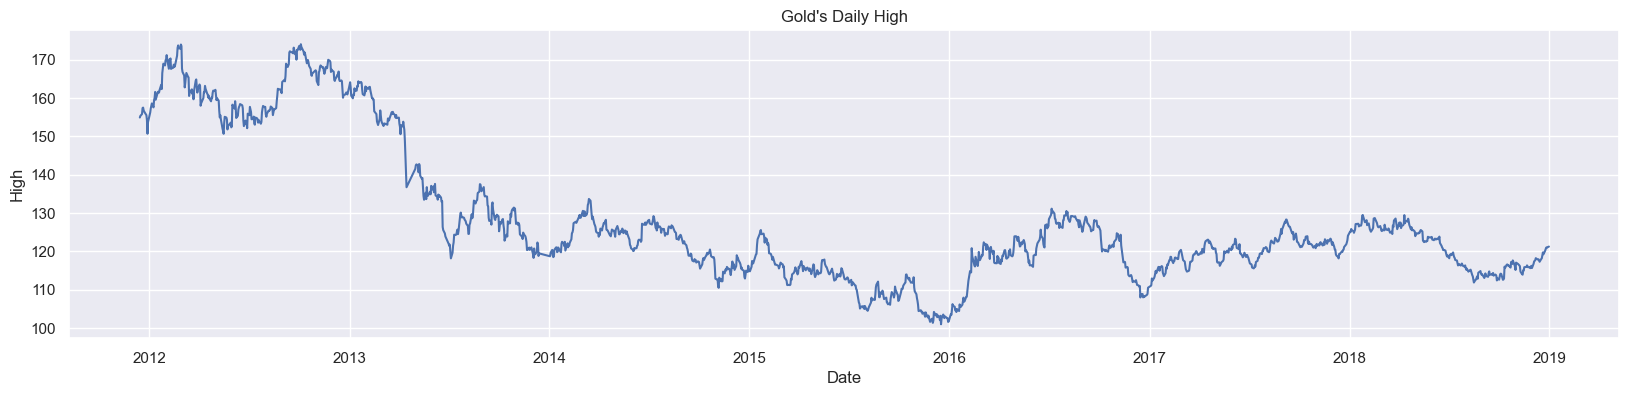

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

# Plot volatility
sns.set(rc={"figure.figsize":(20, 4)})
daily_change = sns.lineplot(x="Date", y="High", data=df).set(title="Gold's Daily High")

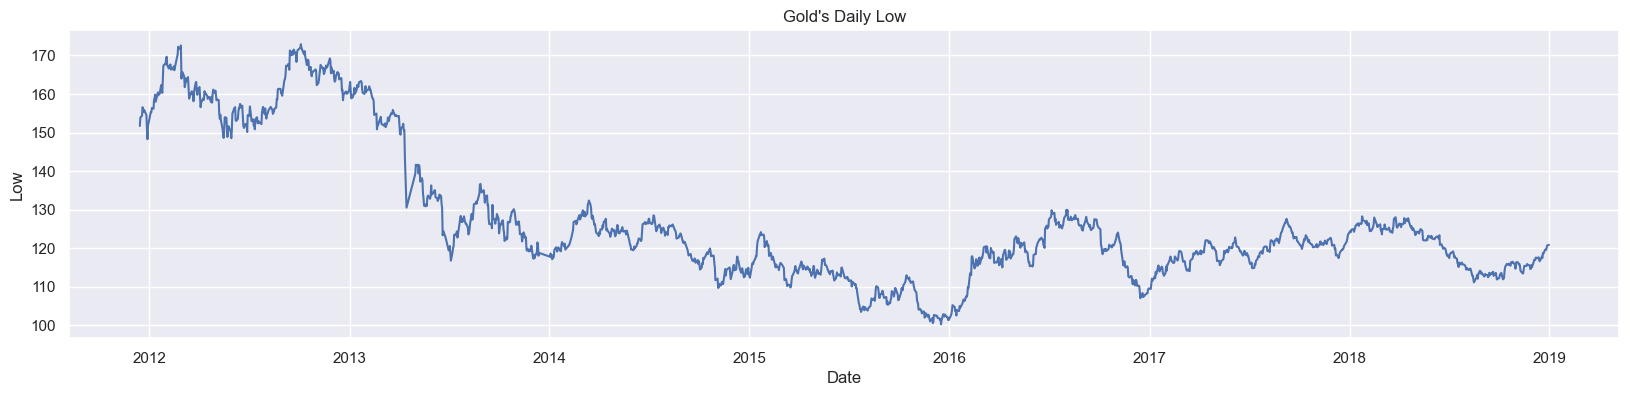

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

# Plot volatility
sns.set(rc={"figure.figsize":(20, 4)})
daily_change = sns.lineplot(x="Date", y="Low", data=df).set(title="Gold's Daily Low")

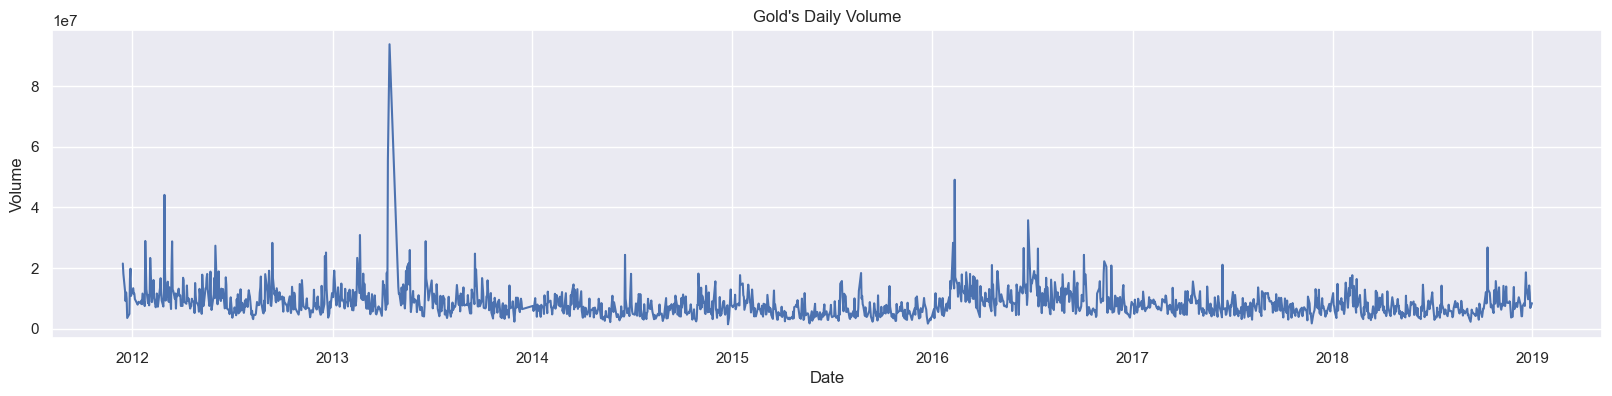

In [14]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

# Plot volatility
sns.set(rc={"figure.figsize":(20, 4)})
daily_change = sns.lineplot(x="Date", y="Volume", data=df).set(title="Gold's Daily Volume")

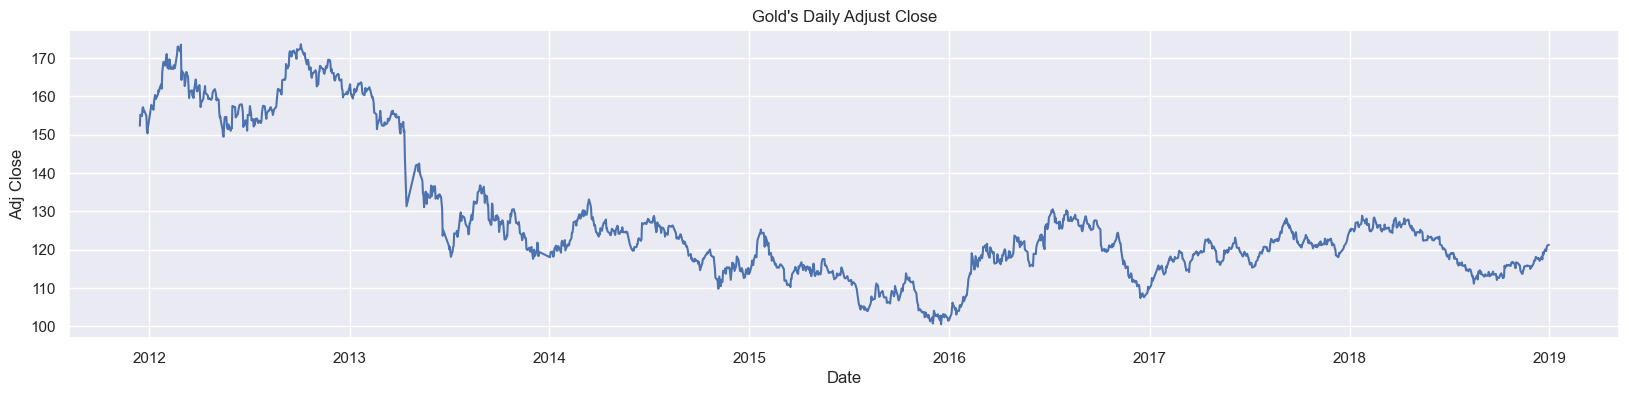

In [15]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

# Plot volatility
sns.set(rc={"figure.figsize":(20, 4)})
daily_change = sns.lineplot(x="Date", y="Adj Close", data=df).set(title="Gold's Daily Adjust Close")

# Kéo dữ liệu close với adj close lên 1 ngày

In [16]:
# Save filepath for easier access
gold_file_path_new = 'FINAL_USO - Copy.csv'

# Read the data with pandas and store it in a dataframe titled gold data
df = pd.read_csv(gold_file_path_new)

In [8]:
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,12/15/2011,154.740005,154.949997,151.710007,155.229996,155.229996,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,12/16/2011,154.309998,155.369995,153.899994,154.869995,154.869995,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,12/19/2011,155.479996,155.860001,154.360001,156.979996,156.979996,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200


# Nội suy điểm thiếu

In [17]:
from scipy.interpolate import interp1d
from pykalman import KalmanFilter

In [18]:
# Chuyển đổi cột ngày thành datetime
df['Date'] = pd.to_datetime(df['Date'])

# Thiết lập ngày làm chỉ mục
#df.set_index('Date', inplace=True)

In [19]:
df.set_index('Date', inplace=True)

In [20]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,155.229996,155.229996,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,154.869995,154.869995,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,156.979996,156.979996,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,157.160004,157.160004,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,156.039993,156.039993,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [21]:
# Tạo khoảng thời gian đầy đủ bao gồm tất cả các ngày trong phạm vi
full_date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

# Tìm các ngày bị thiếu
missing_dates = full_date_range.difference(df.index)

# Điền các ngày bị thiếu vào DataFrame với giá trị NaN
df = df.reindex(full_date_range)

# In dữ liệu sau khi điền ngày bị thiếu
print("Dữ liệu sau khi thêm các ngày bị thiếu:")
print(df)

Dữ liệu sau khi thêm các ngày bị thiếu:
                  Open        High         Low       Close   Adj Close  \
2011-12-15  154.740005  154.949997  151.710007  155.229996  155.229996   
2011-12-16  154.309998  155.369995  153.899994  154.869995  154.869995   
2011-12-17         NaN         NaN         NaN         NaN         NaN   
2011-12-18         NaN         NaN         NaN         NaN         NaN   
2011-12-19  155.479996  155.860001  154.360001  156.979996  156.979996   
...                ...         ...         ...         ...         ...   
2018-12-24  119.570000  120.139999  119.570000  119.660004  119.660004   
2018-12-25         NaN         NaN         NaN         NaN         NaN   
2018-12-26  120.620003  121.000000  119.570000  120.570000  120.570000   
2018-12-27  120.570000  120.900002  120.139999  121.059998  121.059998   
2018-12-28  120.800003  121.080002  120.720001  121.250000  121.250000   

                Volume     SP_open     SP_high      SP_low    SP_close 

In [22]:
# 1. Suy Luận Đa Thức
def polynomial_interpolation(df, degree=2):
    for column in df.columns:
        df_notna = df[column].dropna()
        x = df_notna.index.map(pd.Timestamp.toordinal)
        y = df_notna.values
        if len(x) > degree:
            coeffs = np.polyfit(x, y, degree)
            poly_func = np.poly1d(coeffs)
            df[column] = df.index.map(pd.Timestamp.toordinal).map(poly_func)
    return df

# 2. Lọc Kalman
def kalman_smoothing(df):
    for column in df.columns:
        measurements = df[column].values
        measurements[np.isnan(measurements)] = 0
        kf = KalmanFilter(initial_state_mean=measurements[0], n_dim_obs=1)
        state_means, _ = kf.em(measurements).smooth(measurements)
        df[column] = state_means
    return df

# Lựa chọn phương pháp: 'poly' cho suy luận đa thức hoặc 'kalman' cho Lọc Kalman
method = 'kalman'  # Hoặc 'kalman'

if method == 'poly':
    df_filled = polynomial_interpolation(df.copy(), degree=2)
elif method == 'kalman':
    df_filled = kalman_smoothing(df.copy())

# In dữ liệu sau khi điền giá trị bị thiếu
print("\nDữ liệu sau khi điền giá trị bị thiếu:")
print(df_filled)


Dữ liệu sau khi điền giá trị bị thiếu:
                  Open        High         Low       Close   Adj Close  \
2011-12-15  142.695623  143.017375  140.311659  143.163261  143.163261   
2011-12-16  122.148662  122.556877  120.662639  122.572274  122.572274   
2011-12-17   91.911787   92.209222   91.057504   92.271436   92.271436   
2011-12-18   89.367089   89.645793   88.728273   89.710691   89.710691   
2011-12-19  113.747872  114.094184  112.977236  114.120188  114.120188   
...                ...         ...         ...         ...         ...   
2018-12-24   70.887303   71.152853   70.719539   71.018730   71.018730   
2018-12-25   69.839640   70.075033   69.632632   69.985520   69.985520   
2018-12-26   89.834019   90.112028   89.403898   89.992460   89.992460   
2018-12-27  100.552864  100.841945  100.139030  100.806698  100.806698   
2018-12-28  105.240730  105.528024  104.882953  105.532070  105.532070   

                  Volume     SP_open     SP_high      SP_low    SP_clos

In [23]:
df_filled.head(5)

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
2011-12-15,142.695623,143.017375,140.311659,143.163261,143.163261,1.923534e+07,113.397547,113.641945,112.443567,112.646811,...,47.254632,47.450179,44.940603,1.829357e+07,33.566544,33.654096,32.855451,33.009096,33.009096,1.158060e+07
2011-12-16,122.148662,122.556877,120.662639,122.572274,122.572274,1.564905e+07,96.951671,97.263939,96.103283,96.367418,...,40.609341,40.849272,38.692923,1.469997e+07,28.775926,28.902666,28.275322,28.485452,28.485452,9.457358e+06
2011-12-17,91.911787,92.209222,91.057504,92.271436,92.271436,1.159175e+07,72.962698,73.194959,72.235468,72.533387,...,30.510220,30.644642,29.018346,1.072773e+07,21.802130,21.914575,21.516053,21.690790,21.690790,5.962753e+06
2011-12-18,89.367089,89.645793,88.728273,89.710691,89.710691,9.740229e+06,70.745918,71.042169,69.948027,70.424475,...,29.629912,29.774584,28.199990,9.317530e+06,21.256949,21.378151,21.046325,21.224070,21.224070,5.087796e+06
2011-12-19,113.747872,114.094184,112.977236,114.120188,114.120188,9.742177e+06,89.639840,90.160978,88.557586,89.409023,...,37.702428,37.974074,35.988097,1.013259e+07,26.979632,27.135471,26.728827,26.949132,26.949132,6.448088e+06


In [24]:
df = df_filled

In [25]:
# Lưu dữ liệu sau khi điền vào file CSV
df_filled.to_csv('gold_prices_filled_kalman.csv')

# Đầu tiên tạo model hồi quy tuyến tính với 4 thuộc tính để dự báo trước 5 điểm

In [48]:
df = df_filled

In [49]:
# We will start out by selecting features gold ETF features
gold_features = ['Open','High', 'Low', 'Volume']
X = df[gold_features]
X.head()
y = df['Adj Close'] 

In [50]:
# We will start out by selecting features gold ETF features
gold_features = ['Open', 'GDX_Close', 'GDX_Open', 'Low', 'GDX_Low', 'High', 'GDX_High', 'GDX_Adj Close', 'Volume', 'GDX_Volume', 'SF_Low', 'SF_Price', 'SF_Open', 'SF_High', 'SF_Volume', 'OF_Price', 'OF_High', 'OF_Open', 'OF_Low', 'OS_Price', 'OS_Low', 'OS_Open', 'OS_High', 'USO_Volume', 'USDI_High', 'USDI_Price', 'USDI_Open', 'EU_low', 'USDI_Low', 'EU_Price', 'EU_open', 'EU_high', 'EG_low', 'EG_open', 'EG_close', 'EG_high', 'EG_Ajclose', 'USO_Low', 'USO_Open', 'USO_Close', 'USO_Adj Close', 'USO_High', 'SP_volume', 'EG_volume', 'PLT_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low', 'SP_low', 'USDI_Volume', 'SP_close', 'SP_open', 'SP_high', 'OF_Volume', 'SP_Ajclose', 'OS_Trend', 'USB_Trend', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_open', 'DJ_high', 'OF_Trend', 'USB_High', 'USB_Price', 'USB_Open']
X = df[gold_features]
X.head()
y = df['Adj Close'] 

In [30]:
# Define Model
gold_model = LinearRegression()

#Fit Model
gold_model.fit(X, y)

print("Making predicitons for the first 5 entries\n")
print(X.head(10))
print("\nThe predictions are:\n")
print(gold_model.predict(X.head(10)))
print("\nThe actual values are:\n")
print(y.head(10))

Making predicitons for the first 5 entries

                  Open  GDX_Close   GDX_Open         Low    GDX_Low  \
2011-12-15  142.695623  47.450179  48.427351  140.311659  47.254632   
2011-12-16  122.148662  40.849272  41.407767  120.662639  40.609341   
2011-12-17   91.911787  30.644642  30.989798   91.057504  30.510220   
2011-12-18   89.367089  29.774584  30.066335   88.728273  29.629912   
2011-12-19  113.747872  37.974074  38.354453  112.977236  37.702428   
2011-12-20  125.555150  42.153992  42.311788  124.830160  41.747953   
2011-12-21  127.942613  43.033186  43.184473  127.172547  42.583975   
2011-12-22  121.581381  40.888604  41.003966  120.840847  40.447993   
2011-12-23  104.744682  35.237569  35.282976  104.178060  34.891012   
2011-12-24   72.359773  24.239940  24.259543   72.046139  24.058712   

                  High   GDX_High  GDX_Adj Close        Volume    GDX_Volume  \
2011-12-15  143.017375  48.642351      44.940603  1.923534e+07  1.829357e+07   
2011-12-16  12

# Nhận ra model hồi quy tuyến bị xảy ra vấn đề overfitting

# Model Validation

In [31]:
predicted_adj_close = gold_model.predict(X.head())
print(mean_absolute_error(y.head(),predicted_adj_close))

predicted_adj_close = gold_model.predict(X)
print(mean_absolute_error(y, predicted_adj_close))

0.7458832758933142
0.20270410141870218


# Chia nhỏ dữ liệu thành train, test, validation để tránh overfitting

In [32]:
# Partition data into training and validation groups
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define a new model for training set
gold_model = LinearRegression()
# Fit model
gold_model.fit(train_X, train_y)

#get predicted prices on validation data
val_predictions = gold_model.predict(val_X)
print(mean_absolute_error(val_y,val_predictions))

0.21424750468942055


# Điều chỉnh Model tránh overfitting thông qua Cross-Validation

MAE: 0.21424750468942055


<Axes: xlabel='Adj Close'>

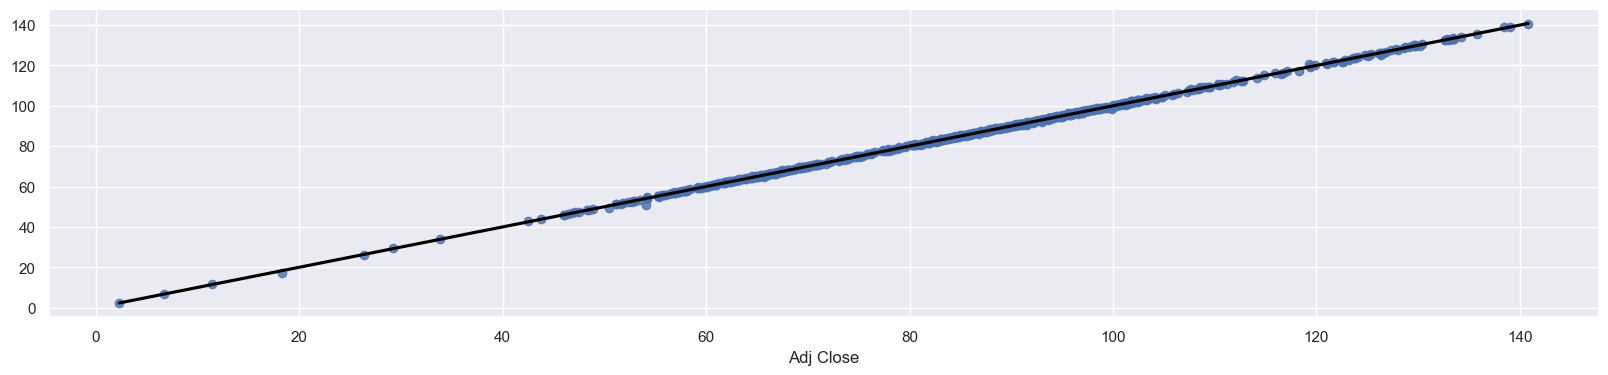

In [33]:
# TẠO DATA PIPELINE
gold_model = LinearRegression()

# Bundle preporcessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('gold_model', gold_model)])
# Preprocessing of training data, fit model
my_pipeline.fit(train_X, train_y)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(val_X)

# Evaluate the model
mae_score = mean_absolute_error(val_y, preds)
print('MAE:', mae_score)

# Display Model
sns.regplot(x=val_y, y=preds, line_kws={"color":"black"})

In [34]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring = 'neg_mean_absolute_error')
print("MAE scores:\n",scores,"\n")
print("Average MAE score (across all ten folds):")
print(scores.mean())

rmse = math.sqrt(mean_squared_error(val_y,preds))
print("\nRMSE is",rmse)

r2 = r2_score(val_y, preds)
print("\nr2 score is", r2)

MAE scores:
 [0.33922035 0.30601465 0.34552164 0.21872249 0.2404411  0.22394539
 0.25042285 0.15398405 0.22118367 0.31103321] 

Average MAE score (across all ten folds):
0.26104894065280715

RMSE is 0.3173439856991082

r2 score is 0.9997763428804054


# Hồi quy tuyến tính với 4 metrics

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Giả sử dữ liệu của bạn đã được chuẩn bị
# X = features, y = target

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Tính toán các chỉ số lỗi
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# In các chỉ số lỗi
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")

# Cross-validation
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)
mape_scorer = make_scorer(lambda y, y_pred: np.mean(np.abs((y - y_pred) / y)) * 100, greater_is_better=False)

mse_scores = cross_val_score(model, X, y, cv=10, scoring=mse_scorer)
mae_scores = cross_val_score(model, X, y, cv=10, scoring=mae_scorer)
rmse_scores = cross_val_score(model, X, y, cv=10, scoring=rmse_scorer)
mape_scores = cross_val_score(model, X, y, cv=10, scoring=mape_scorer)

print("\nCross-validation scores:")
print("MSE scores:\n", -mse_scores)
print("Average MSE score (across all ten folds):", -mse_scores.mean())
print("MAE scores:\n", -mae_scores)
print("Average MAE score (across all ten folds):", -mae_scores.mean())
print("RMSE scores:\n", -rmse_scores)
print("Average RMSE score (across all ten folds):", -rmse_scores.mean())
print("MAPE scores:\n", -mape_scores)
print("Average MAPE score (across all ten folds):", -mape_scores.mean())

Mean Squared Error (MSE): 0.08472186852762725
Mean Absolute Error (MAE): 0.20844232188591952
Root Mean Squared Error (RMSE): 0.2910702123674411
Mean Absolute Percentage Error (MAPE): 0.2828849970565852 %

Cross-validation scores:
MSE scores:
 [0.23648678 0.24513408 0.20945665 0.0734874  0.08838611 0.08243697
 0.1086566  0.04131032 0.07799239 0.13664304]
Average MSE score (across all ten folds): 0.12999903264990603
MAE scores:
 [0.33922035 0.30601465 0.34552164 0.21872249 0.2404411  0.22394539
 0.25042285 0.15398405 0.22118367 0.31103321]
Average MAE score (across all ten folds): 0.26104894065280715
RMSE scores:
 [0.48629906 0.49511017 0.45766434 0.2710856  0.29729802 0.28711838
 0.32963101 0.2032494  0.27927117 0.36965259]
Average RMSE score (across all ten folds): 0.3476379736456752
MAPE scores:
 [0.30904079 0.56373224 1.12996722 0.26063548 0.30361584 0.30356811
 0.29638992 0.19431578 0.2629244  0.38594413]
Average MAPE score (across all ten folds): 0.40101339080875986


# Số thuộc tính sau khi dùng mRMR
Best K: 67
Selected features: ['Open', 'GDX_Close', 'GDX_Open', 'Low', 'GDX_Low', 'High', 'GDX_High', 'GDX_Adj Close', 'Volume', 'GDX_Volume', 'SF_Low', 'SF_Price', 'SF_Open', 'SF_High', 'SF_Volume', 'OF_Price', 'OF_High', 'OF_Open', 'OF_Low', 'OS_Price', 'OS_Low', 'OS_Open', 'OS_High', 'USO_Volume', 'USDI_High', 'USDI_Price', 'USDI_Open', 'EU_low', 'USDI_Low', 'EU_Price', 'EU_open', 'EU_high', 'EG_low', 'EG_open', 'EG_close', 'EG_high', 'EG_Ajclose', 'USO_Low', 'USO_Open', 'USO_Close', 'USO_Adj Close', 'USO_High', 'SP_volume', 'EG_volume', 'PLT_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low', 'SP_low', 'USDI_Volume', 'SP_close', 'SP_open', 'SP_high', 'OF_Volume', 'SP_Ajclose', 'OS_Trend', 'USB_Trend', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_open', 'DJ_high', 'OF_Trend', 'USB_High', 'USB_Price', 'USB_Open']

In [51]:
df = pd.read_csv('gold_prices_filled_kalman.csv')

In [52]:
columns_to_keep = ['Adj Close', 'Open', 'GDX_Close', 'GDX_Open', 'Low', 'GDX_Low', 'High', 'GDX_High', 'GDX_Adj Close', 'Volume', 'GDX_Volume', 'SF_Low', 'SF_Price', 'SF_Open', 'SF_High', 'SF_Volume', 'OF_Price', 'OF_High', 'OF_Open', 'OF_Low', 'OS_Price', 'OS_Low', 'OS_Open', 'OS_High', 'USO_Volume', 'USDI_High', 'USDI_Price', 'USDI_Open', 'EU_low', 'USDI_Low', 'EU_Price', 'EU_open', 'EU_high', 'EG_low', 'EG_open', 'EG_close', 'EG_high', 'EG_Ajclose', 'USO_Low', 'USO_Open', 'USO_Close', 'USO_Adj Close', 'USO_High', 'SP_volume', 'EG_volume', 'PLT_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low', 'SP_low', 'USDI_Volume', 'SP_close', 'SP_open', 'SP_high', 'OF_Volume', 'SP_Ajclose', 'OS_Trend', 'USB_Trend', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_open', 'DJ_high', 'OF_Trend', 'USB_High', 'USB_Price', 'USB_Open']  # Thay thế bằng danh sách tên cột mà bạn muốn giữ lại
df = df[columns_to_keep]
df.head(3)

,Adj Close,Open,GDX_Close,GDX_Open,Low,GDX_Low,High,GDX_High,GDX_Adj Close,Volume,...,USB_Trend,DJ_low,DJ_close,DJ_Ajclose,DJ_open,DJ_high,OF_Trend,USB_High,USB_Price,USB_Open
0,143.163261,142.695623,47.450179,48.427351,140.311659,47.254632,143.017375,48.642351,44.940603,1.923534e+07,...,0.575148,10911.939449,10953.578590,10953.578590,10920.618366,11045.442906,0.601237,1.645664,1.646214,1.645589
1,122.572274,122.148662,40.849272,41.407767,120.662639,40.609341,122.556877,41.665239,38.692923,1.564905e+07,...,0.337098,9343.790097,9385.391643,9385.391643,9364.177772,9462.620012,0.388459,1.392354,1.392604,1.392319
2,92.271436,91.911787,30.644642,30.989798,91.057504,30.510220,92.209222,31.140395,29.018346,1.159175e+07,...,0.235907,7040.658277,7079.263017,7079.263017,7064.707641,7134.379437,0.334570,0.805120,0.803334,0.805618


In [38]:
# Function to evaluate metrics
def evaluate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mse, mae, rmse, mape

# Chia bộ dữ liệu thành TRAIN, VALIDATION, TEST sau đó áp dụng scaling

In [54]:
y = df['Adj Close']
X= df.drop(columns=['Adj Close']).copy()
X_scaled = StandardScaler().fit_transform(X)

In [55]:
train_temp_X, test_X, train_temp_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(train_temp_X, train_temp_y, test_size=0.25, random_state=42)

# Mô hình Decision Tree Regression

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
4860 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
205 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ba

Best parameters found:  {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Mean Absolute Error (MAE): 0.462
Root Mean Squared Error (RMSE): 0.631
R^2 Score: 0.999
X size:  (1542, 67)
y size:  (1542,)


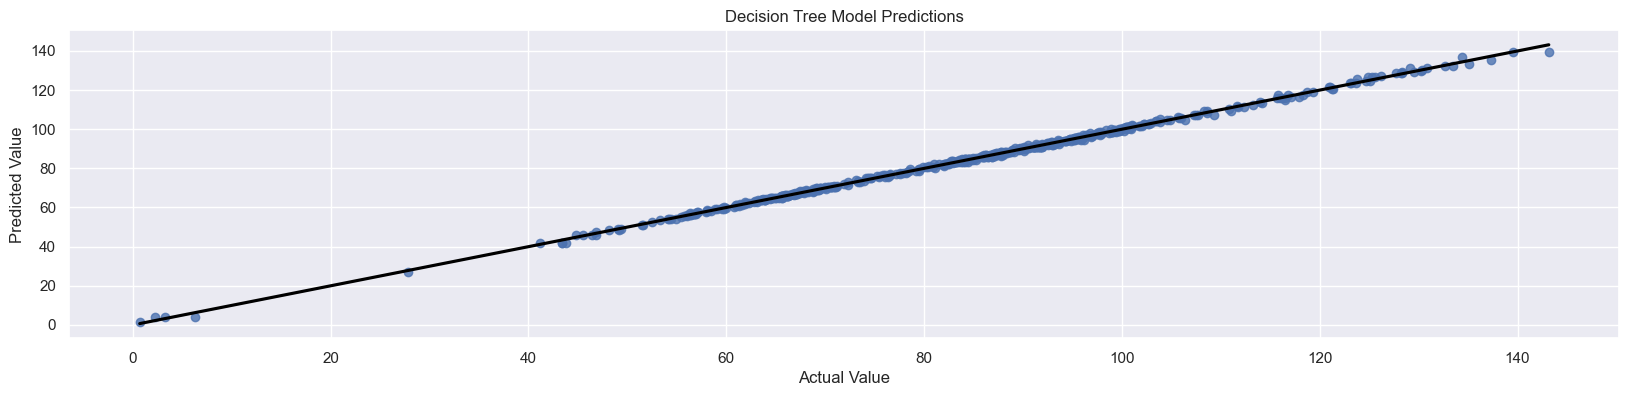

In [43]:
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_absolute_error', 
                           verbose=2, 
                           n_jobs=-1)

# Huấn luyện mô hình trên dữ liệu huấn luyện
grid_search.fit(train_X, train_y)

# In ra tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)

# Sử dụng mô hình với tham số tốt nhất
best_dt_model = grid_search.best_estimator_

# Dự đoán trên tập dữ liệu validation
y_pred = best_dt_model.predict(val_X)

# Tính toán các chỉ số đánh giá: MAE, RMSE và R^2 Score
mae = mean_absolute_error(val_y, y_pred)
mse = mean_squared_error(val_y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(val_y, y_pred)

# In ra các chỉ số đánh giá
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")
print("X size: ", train_X.shape)
print("y size: ", train_y.shape)

# Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán
sns.regplot(x=val_y, y=y_pred, line_kws={"color": "black"})
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Decision Tree Model Predictions')

# Đặt định dạng trục y không sử dụng khoa học
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.show()

# Mô hình Random Forest Regression

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
403 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ba

Best parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
[ 91.33065927  96.53709931  67.89717949  63.80752327 109.18059836
  85.11287246  83.58007219  84.25627701  89.99673792  47.01117628]
Mean Absolute Error: 0.466
R^2 Score: 0.999
X size:  (1542, 67)
y size:  (1542,)


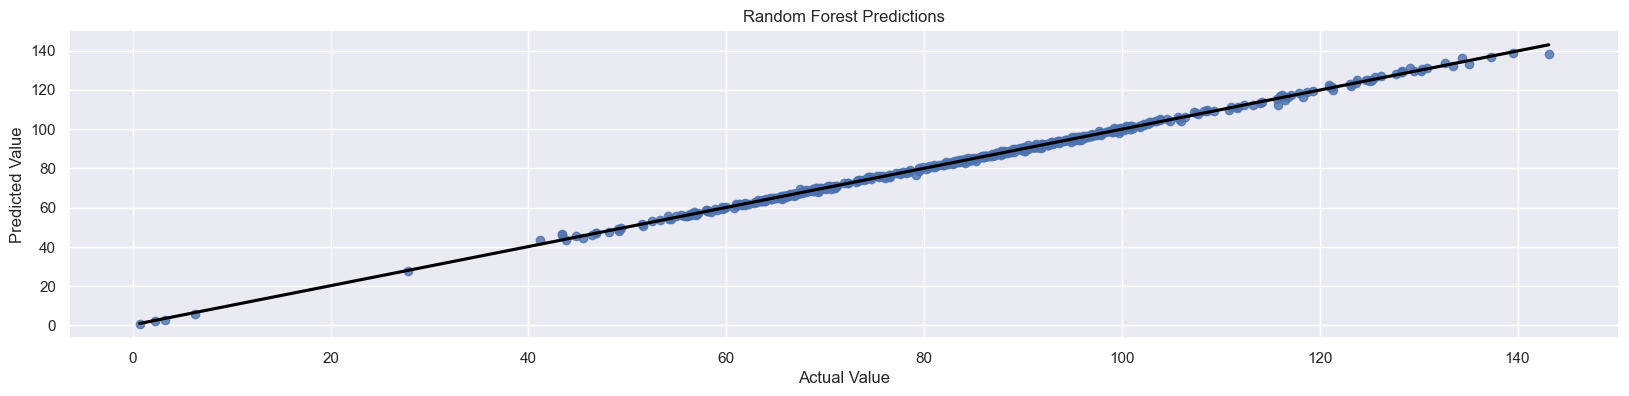

In [44]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_absolute_error', 
                           verbose=2, 
                           n_jobs=-1)

# Huấn luyện mô hình trên dữ liệu huấn luyện
grid_search.fit(train_X, train_y)

# In ra tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)

# Sử dụng mô hình với tham số tốt nhất
best_rf_model = grid_search.best_estimator_

# Dự đoán trên tập dữ liệu validation
y_pred_rf = best_rf_model.predict(val_X)
print(y_pred_rf[:10])

# Tính toán các chỉ số đánh giá
mae = mean_absolute_error(val_y, y_pred_rf)
r2 = r2_score(val_y, y_pred_rf)

# In ra các chỉ số đánh giá
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R^2 Score: {r2:.3f}")
print("X size: ", train_X.shape)
print("y size: ", train_y.shape)

# Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán
sns.regplot(x=val_y, y=y_pred_rf, line_kws={"color": "black"})

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Random Forest Predictions')

# Đặt định dạng trục y không sử dụng khoa học
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.show()

# Mô hình Support Vector Regression

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END .........C=1, epsilon=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.001, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.001, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.001, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.001, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.001, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.001, gamma=0.08, kernel=rbf; total time=   0.0s
[CV] END .........C=1, epsilon=0.001, gamma=0.

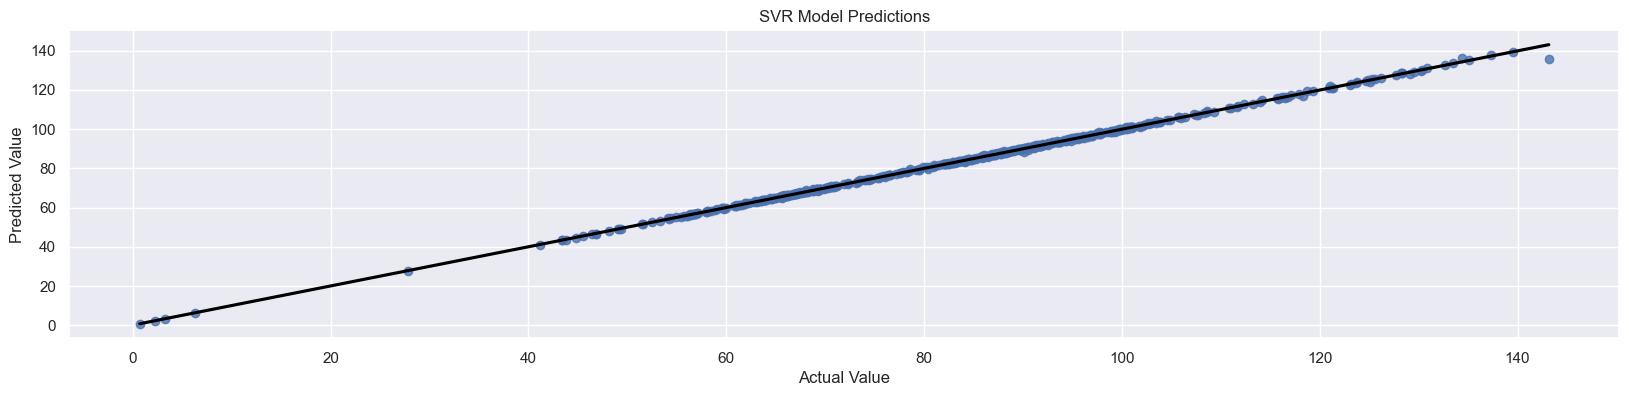

In [45]:
# Đoạn code GridSearchCV và huấn luyện mô hình SVR
param_grid = {
    'C': [1, 10, 100, 1000, 10000, 50000],
    'gamma': [0.01, 0.05, 0.08, 0.1, 0.5, 1],
    'epsilon': [0.001, 0.01, 0.1, 0.5, 1],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(train_X, train_y)

# In ra tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)

# Sử dụng mô hình với tham số tốt nhất
best_svr_model = grid_search.best_estimator_

# Dự đoán trên tập dữ liệu validation
y_pred = best_svr_model.predict(val_X)

# Tính toán các chỉ số đánh giá
mae = mean_absolute_error(val_y, y_pred)
mse = mean_squared_error(val_y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(val_y, y_pred)

# In ra các chỉ số đánh giá
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")
print("X size: ", train_X.shape)
print("y size: ", train_y.shape)

# Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán
sns.regplot(x=val_y, y=y_pred, line_kws={"color": "black"})
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('SVR Model Predictions')
plt.show()

# Mô hình gradientboosting regression 

Metrics for Validation set:
  Mean Squared Error (MSE): 0.3270
  Mean Absolute Error (MAE): 0.3833
  Root Mean Squared Error (RMSE): 0.5718
  Mean Absolute Percentage Error (MAPE): 0.84%

Metrics for Test set:
  Mean Squared Error (MSE): 0.3334
  Mean Absolute Error (MAE): 0.3758
  Root Mean Squared Error (RMSE): 0.5774
  Mean Absolute Percentage Error (MAPE): 0.52%



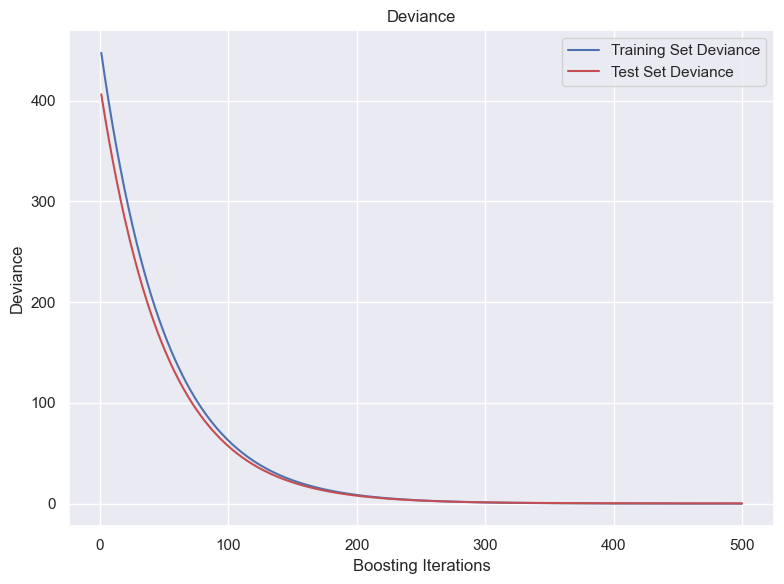

In [56]:
# Main function to run the Gradient Boosting Regression
def gradient_boosting_regression(df, target_col):
    # Prepare features and target variable
    feature_cols = df.columns[df.columns != target_col]
    X = df[feature_cols].values
    y = df[target_col].values

    # Split data into train and test sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

    # Further split train set into train and validation sets (75-25 split)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    # Initialize StandardScaler and fit on training set
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Set Gradient Boosting parameters
    params = {
        "n_estimators": 500,
        "max_depth": 4,
        "min_samples_split": 5,
        "learning_rate": 0.01,
        "loss": "squared_error",  # Corrected to 'squared_error'
    }

    # Initialize and fit the Gradient Boosting Regressor
    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(X_train_scaled, y_train)

    # Predictions on validation set
    y_val_pred = reg.predict(X_val_scaled)

    # Evaluate metrics on validation set
    mse_val, mae_val, rmse_val, mape_val = evaluate_metrics(y_val, y_val_pred)
    print(f"Metrics for Validation set:")
    print(f"  Mean Squared Error (MSE): {mse_val:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae_val:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse_val:.4f}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape_val:.2f}%\n")

    # Predictions on test set
    y_test_pred = reg.predict(X_test_scaled)

    # Evaluate metrics on test set
    mse_test, mae_test, rmse_test, mape_test = evaluate_metrics(y_test, y_test_pred)
    print(f"Metrics for Test set:")
    print(f"  Mean Squared Error (MSE): {mse_test:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae_test:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse_test:.4f}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%\n")

    # Plot training and testing deviance
    train_score = np.zeros((params["n_estimators"],), dtype=np.float64)
    test_score = np.zeros((params["n_estimators"],), dtype=np.float64)

    for i, (y_train_pred_stage, y_test_pred_stage) in enumerate(zip(
            reg.staged_predict(X_train_scaled), reg.staged_predict(X_test_scaled))):
        train_score[i] = mean_squared_error(y_train, y_train_pred_stage)
        test_score[i] = mean_squared_error(y_test, y_test_pred_stage)

    # Plot the deviance
    fig = plt.figure(figsize=(8, 6))
    plt.title("Deviance")
    plt.plot(np.arange(params["n_estimators"]) + 1, train_score, "b-", label="Training Set Deviance")
    plt.plot(np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance")
    plt.legend(loc="upper right")
    plt.xlabel("Boosting Iterations")
    plt.ylabel("Deviance")
    plt.tight_layout()
    plt.show()

    # Return predictions for test set
    return y_test_pred

# Example usage
# Assuming 'df' is your DataFrame and 'Close' is the target column
target_column = 'Adj Close'
y_test_pred = gradient_boosting_regression(df, target_column)

# TIẾP THEO ĐÓ NHÓM DÙNG XGBOOST REGRESSION ĐỂ ĐÁNH GIÁ CÁC METRICS, XGBOOST là cải tiến của Gradient Boosting

In [57]:
def split_data(df):
    X = df.drop(columns=['Adj Close'])  # X là các feature
    y = df['Adj Close']  # y là target variable

    # Chia dữ liệu thành train và test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Tiếp tục chia X_train thành train và validation
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test

In [58]:
def split_data(df):
    X = df.drop(columns=['Adj Close'])  # X là các feature
    y = df['Adj Close']  # y là target variable

# Split data into train and test sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Further split train set into train and validation sets (75-25 split)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    # Initialize StandardScaler and fit on training set
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test

# Huấn luyện mô hình XGBoost:

In [59]:
def train_xgboost_model(X_train_scaled, y_train, X_val_scaled, y_val):
    params = {
        'objective': 'reg:squarederror',  # Loss function
        'eval_metric': 'rmse',  # Metric for evaluation
        'learning_rate': 0.1,
        'max_depth': 5,
        'min_child_weight': 1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'seed': 42
    }

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)

    evals_result = {}
    model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dval, 'eval')], early_stopping_rounds=20,
                      verbose_eval=50, evals_result=evals_result)

    return model, evals_result

# Đánh giá mô hình trên tập test:

## Mô hình Decision Tree

In [60]:
y_pred = best_dt_model.fit(train_X, train_y).predict(test_X)

# Tính toán các chỉ số đánh giá
mae = mean_absolute_error(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_y - y_pred) /test_y)) * 100
r2 = r2_score(test_y, y_pred)

# In ra các chỉ số đánh giá
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"MAPE: {mape:.2f}%")
print(f"R^2 Score: {r2:.3f}")

Mean Absolute Error (MAE): 0.491
Mean Squared Error (MSE): 0.602
Root Mean Squared Error (RMSE): 0.776
MAPE: 0.92%
R^2 Score: 0.999


## Mô hình Random Forest Regression

In [61]:
y_pred = best_rf_model.fit(train_X, train_y).predict(test_X)

# Tính toán các chỉ số đánh giá
mae = mean_absolute_error(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_y - y_pred) /test_y)) * 100
r2 = r2_score(test_y, y_pred)

# In ra các chỉ số đánh giá
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"MAPE: {mape:.2f}%")
print(f"R^2 Score: {r2:.3f}")

Mean Absolute Error (MAE): 0.480
Mean Squared Error (MSE): 0.509
Root Mean Squared Error (RMSE): 0.714
MAPE: 0.73%
R^2 Score: 0.999


## Mô hình Support Vector Regression

In [62]:
y_pred = best_svr_model.fit(train_X, train_y).predict(test_X)

# Tính toán các chỉ số đánh giá
mae = mean_absolute_error(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_y - y_pred) /test_y)) * 100
r2 = r2_score(test_y, y_pred)

# In ra các chỉ số đánh giá
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"MAPE: {mape:.2f}%")
print(f"R^2 Score: {r2:.3f}")

Mean Absolute Error (MAE): 0.240
Mean Squared Error (MSE): 0.116
Root Mean Squared Error (RMSE): 0.340
MAPE: 0.29%
R^2 Score: 1.000


## Mô hình XgBoost

In [63]:
def evaluate_model(model, X_test, y_test):
    dtest = xgb.DMatrix(X_test)
    y_pred = model.predict(dtest)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.2f}%")

    return mse, mae, rmse, mape

In [64]:
# Chia dữ liệu thành train, validation và test
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df)

# Huấn luyện mô hình
model, evals_result = train_xgboost_model(X_train, y_train, X_val, y_val)

# Đánh giá mô hình trên tập test
mse, mae, rmse, mape = evaluate_model(model, X_test, y_test)

[0]	eval-rmse:20.43822
[50]	eval-rmse:0.82665
[100]	eval-rmse:0.81173
[150]	eval-rmse:0.80741
[200]	eval-rmse:0.80458
[250]	eval-rmse:0.80263
[288]	eval-rmse:0.80188
MSE: 0.4630
MAE: 0.3840
RMSE: 0.6805
MAPE: 0.58%
